<a href="https://colab.research.google.com/github/pedrozanineli/covid-19-vacinacao/blob/main/Covid_19_Vacina%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Covid-19 e vacinação no Brasil**

Em um período de tanta insegurança e dificuldades como é a pandemia do Coronavírus, presenciamos muitas notícias falsas e desinformação, inclusive a respeito da vacina contra o vírus.

Esse breve estudo tem o objetivo de comparar o ano de 2021, que se iniciou sem a vacinação, ao ano de 2022, com um significativo avanço da imunização, apoiando-se da base de dados da Our World in Data(*).

(*) Our World in Data: https://ourworldindata.org/explorers/coronavirus-data-explorer

19 de Janeiro de 2021, Pedro Zanineli (pedro.zanineli12@gmail.com)

### **Pré-processamento dos dados e bibliotecas**

Como ponto de partida, faz-se necessária a utilização de bibliotecas escritas em Python que possibilitem a análise das informações que são de interesse. Para tanto, na célula seguinte a importação destas acontece.

Última atualização da base de dados: 18 de Janeiro de 2021 no repositório pessoal do Github.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

### **Declaração da base de dados**

Nas células seguintes, acontece a importação da base de dados, assim como a sua atribuição a uma variável. Adiante, acontece novamente uma declaração, mas para uma dataframe apenas com os dados do Brasil.

Posteriormente, há um tratamento dos dados presentes, a exemplo dos campos de horário e dos valores NA. Quanto ao segundo, é importante observar que precisamos considerar os valores NA como os dias em que não tivemos registro de tal informação.

Ou seja, se o valor NA for encontrado na coluna de pessoas vacinadas, assim como acontece, podemos concluir que, na data especificada na tupla, ainda não tínhamos pessoas vacinadas.

In [2]:
urldados = 'https://github.com/pedrozanineli/estudo-covid-19/blob/main/owid-covid-data.zip?raw=true'
dfcovid = pd.read_csv(urldados, compression = 'zip')

In [3]:
dfbrasil = dfcovid[dfcovid['iso_code']=='BRA']
dfbrasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
19919,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
19920,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
19921,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
19922,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
19923,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [4]:
dfbrasil['date'] =  pd.to_datetime(dfbrasil['date'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
pd.to_numeric(dfbrasil['new_deaths'], errors='coerce').fillna(0, downcast='infer')

19919      0
19920      0
19921      0
19922      0
19923      0
        ... 
20606    189
20607    233
20608    170
20609     94
20610    151
Name: new_deaths, Length: 692, dtype: int64

### **Analisando o número de pessoas vacinadas**

Buscamos, agora, o número de pessoas vacinadas no início de 2021 e no início de 2022, a fim de que possamos analisar posteriormente os óbitos registrados em cada um desses anos e o efeito que a vacina proporcionou.

É importante notar que se espera, para o início de 2021, a não existência de dados, uma vez que a primeira dose aplicada foi apenas no dia 17 de Janeiro(*).

A partir dessas informações, podemos encontrar qual percentual a vacinação representa, sabendo que a população total do Brasil foi estimada no final do último ano, ou seja, no final de 2021.

(*) Primeira dose aplicada no Brasil: https://www.istoedinheiro.com.br/brasil-aplica-a-primeira-vacina-contra-a-covid-19-apos-aprovacao-da-anvisa/

In [6]:
# Número de pessoas vacinadas no início de 2021 e 2022
# Resultado esperado para 2021: NAN

dataatual = "2021/1/1"
vacinados21 = float(dfbrasil.loc[dfbrasil['date']==dataatual, 'people_fully_vaccinated'])

dataatual = "2022/1/1"
vacinados22 = float(dfbrasil.loc[dfbrasil['date']==dataatual, 'people_fully_vaccinated'])

print("Número de pessoas vacinadas no início de 2021: " + str(vacinados21))
print("Número de pessoas vacinadas no início de 2022: " + str(int(vacinados22)))

Número de pessoas vacinadas no início de 2021: nan
Número de pessoas vacinadas no início de 2022: 143441284


In [7]:
# População do Brasil segundo o IBGE
# https://www.synergiaconsultoria.com.br/fique-por-dentro/populacao-brasileira-ultrapassa-213milhoes-de-habitantes/

popbr = 213317639
porcvacinados = vacinados22*100/popbr

print("População total vacinada: " + "%.1f" % porcvacinados + "%")

População total vacinada: 67.2%


### **Comparação entre os dois anos**

Devemos agora voltar nossa atenção ao número de óbitos registrados no Brasil nos 14 primeiros dias do ano, a fim de que possamos ver os efeitos da vacinação e afastar-nos de falsas crenças e da desinformação.

Nas células seguintes, é mostrado o número de falecidos por dia nas duas primeiras semanas, assim como a plotagem dessas informações.

In [8]:
datainicial = "2021/1/1"
datainicial = dt.datetime.strptime(datainicial, "%Y/%m/%d")

datafinal = datainicial + dt.timedelta(days=13)

dataatual = datainicial
mortesdia21 = []

while dataatual <= datafinal:

  auxappend = dfbrasil.loc[dfbrasil['date']==dataatual, 'new_deaths']
  mortesdia21.append(auxappend)

  print(str(dataatual) + " número de óbitos: " + str(int(auxappend)))
  dataatual += dt.timedelta(days=1)

2021-01-01 00:00:00 número de óbitos: 469
2021-01-02 00:00:00 número de óbitos: 293
2021-01-03 00:00:00 número de óbitos: 311
2021-01-04 00:00:00 número de óbitos: 597
2021-01-05 00:00:00 número de óbitos: 1188
2021-01-06 00:00:00 número de óbitos: 1231
2021-01-07 00:00:00 número de óbitos: 1518
2021-01-08 00:00:00 número de óbitos: 1081
2021-01-09 00:00:00 número de óbitos: 1009
2021-01-10 00:00:00 número de óbitos: 490
2021-01-11 00:00:00 número de óbitos: 491
2021-01-12 00:00:00 número de óbitos: 1125
2021-01-13 00:00:00 número de óbitos: 1264
2021-01-14 00:00:00 número de óbitos: 1154


In [9]:
datainicial = "2022/1/1"
datainicial = dt.datetime.strptime(datainicial, "%Y/%m/%d")

datafinal = datainicial + dt.timedelta(days=13)

dataatual = datainicial
mortesdia22 = []

while dataatual <= datafinal:

  auxappend = dfbrasil.loc[dfbrasil['date']==dataatual, 'new_deaths']
  mortesdia22.append(auxappend)

  print(str(dataatual) + " número de óbitos: " + str(int(auxappend)))
  dataatual += dt.timedelta(days=1)

2022-01-01 00:00:00 número de óbitos: 33
2022-01-02 00:00:00 número de óbitos: 34
2022-01-03 00:00:00 número de óbitos: 72
2022-01-04 00:00:00 número de óbitos: 181
2022-01-05 00:00:00 número de óbitos: 0
2022-01-06 00:00:00 número de óbitos: 0
2022-01-07 00:00:00 número de óbitos: 168
2022-01-08 00:00:00 número de óbitos: 115
2022-01-09 00:00:00 número de óbitos: 314
2022-01-10 00:00:00 número de óbitos: 115
2022-01-11 00:00:00 número de óbitos: 141
2022-01-12 00:00:00 número de óbitos: 134
2022-01-13 00:00:00 número de óbitos: 189
2022-01-14 00:00:00 número de óbitos: 233


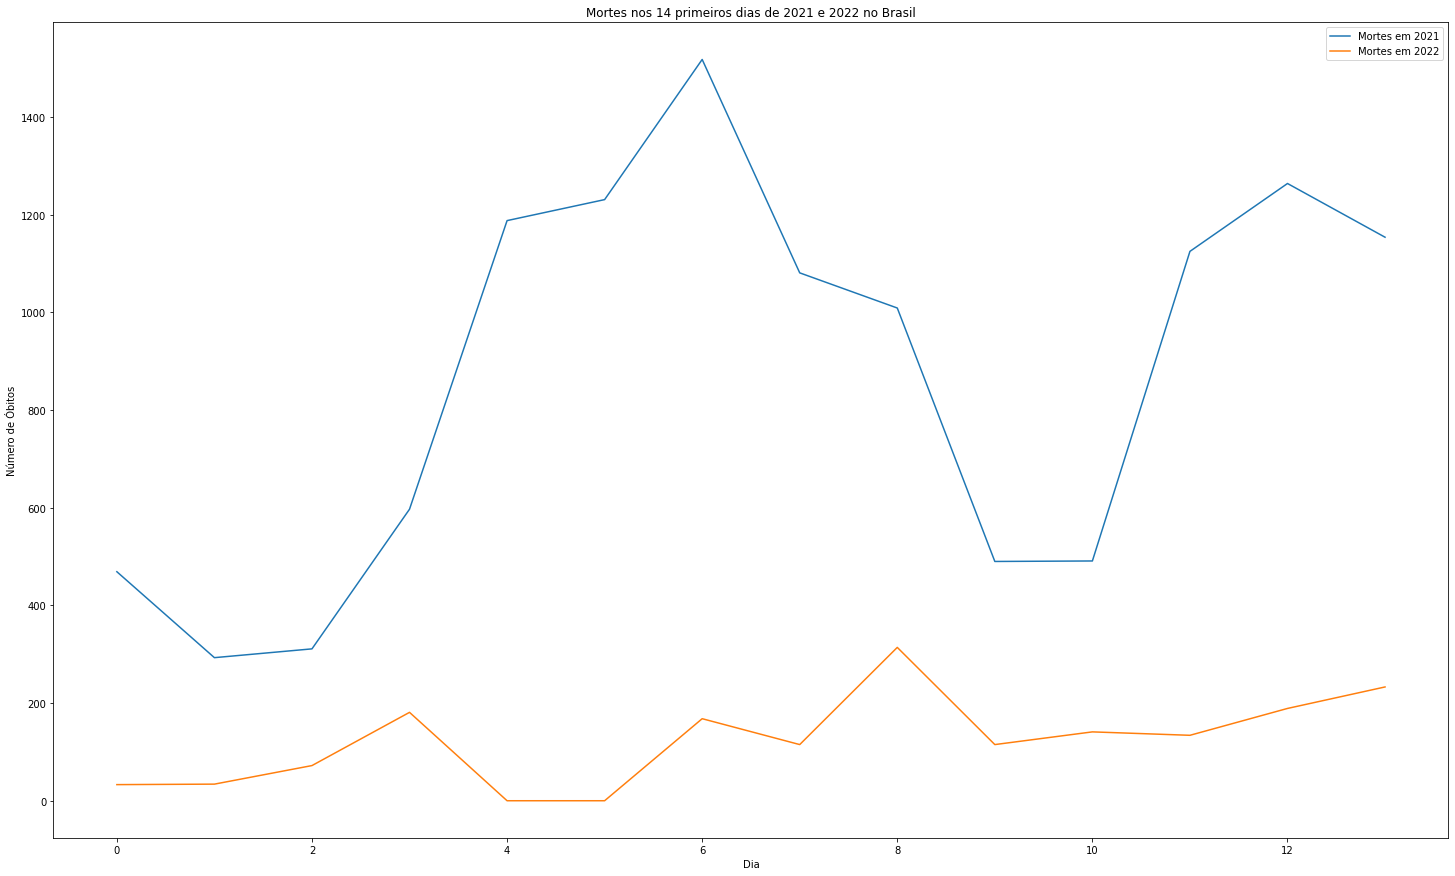

In [11]:
plt.figure(figsize=(25,15))

dfmortesdia = pd.DataFrame({'2021':mortesdia21, '2022': mortesdia22})

plt.plot(dfmortesdia)
plt.legend(['Mortes em 2021','Mortes em 2022'])
plt.title("Mortes nos 14 primeiros dias de 2021 e 2022 no Brasil")

plt.ylabel('Número de Óbitos')
plt.xlabel('Dia')

plt.show()

### **Conclusão**

Podemos observar uma relação direta entre o avanço da vacinação e a diminuição do número de falecidos, mesmo com uma nova onda de infecção provocada pelo avanço das variantes - em especial, da Ômicron. É ainda importante levar em conta que hoje, com 69,5% ([estatísticas do Google](https://news.google.com/covid19/map?hl=en-US&mid=/m/015fr&state=7&gl=US&ceid=US:en)) da população vacinada, ainda temos um grande caminho a ser percorrido e que, com um maior percentual, poderíamos ter tido resultados ainda melhores - o que inclusive estabelece uma relação com a chamada imunização de rebanho, já que uma parcela significativa da população está protegida do vírus e passa ajudar na proteção da outra parcela.

Sobre a vacinação, vale ainda notar que, apesar de não impedir o avanço da pandemia, ou seja, dos casos ainda acontecerem, a hospitalização dos casos aconteceu em sua grande maioria por parte dos que não se vacinaram ou estavam vacinados apenas com a primeira dose (confira: [Maioria dos internados em Minas Gerais não se vacinou ou tomou só a 1ª dose contra covid-19](https://www.correiobraziliense.com.br/brasil/2022/01/4978957-maioria-dos-internados-em-minas-gerais-nao-se-vacinou-ou-tomou-so-a-1-dose-contra-covid-19.html)). Pode-se inclusive perceber uma nova problemática, já que, ao não se vacinar, o problema criado não é apenas individual, como coletivo: uma vez que uma pessoa não vacinada poderá precisar de um leito, retira dessa forma a oportunidade de outra pessoa hospitalizar-se.

Conclui-se, portanto, que a vacinação traz apenas grandes vantagens para a população, além de ter demonstrado empiricamente seus efeitos e diminuição nos casos de morte. Não exime, entretanto, a necessidade do álcool gel, máscara, distanciamento social e outros importantes cuidados.